<a href="https://colab.research.google.com/github/lakshaygola/Anomaly-Detection/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('anomaly-detection')
jovian.set_colab_id('1Xdm5dfOmkd_jvDjCoTrdCKjy97tuh47U')

     |████████████████████████████████| 71kB 4.6MB/s 


In [2]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --upgrade --quiet

In [3]:
# Project name (to commit changes)
project_name = 'anomaly-detection'

In [87]:
# Libaries we need in the project
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

# Getting the dataset from the internet

In [5]:
# Downloading the whole dataset (from kaggle)
datasetLink = 'https://www.kaggle.com/galaxyh/kdd-cup-1999-data'

od.download(datasetLink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lakshaygola
Your Kaggle Key: ··········


  0%|          | 0.00/87.8M [00:00<?, ?B/s]

100%|██████████| 87.8M/87.8M [00:01<00:00, 66.6MB/s]


In [6]:
# Opening the file (This file contain all the feature name)
with open('/content/kdd-cup-1999-data/kddcup.names', 'r') as f:
  print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [7]:
# List of all the feature 
features=['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'attack_type']

In [71]:
# Reading the 10 percent of the dataset
df = pd.read_csv('/content/kdd-cup-1999-data/kddcup.data_10_percent/kddcup.data_10_percent'
                      , names = features)
train_df_uncleaned = df

# Preprocessing
1 - convert the attack to its category

2 - cleand the dataset (NaN values) if any

3 - removing the useless columns from the dataset

4 - Feature mapping and scaling of the dataset 

5 - create the model of the dataset

6 - train the model

7 - get accuracy more than 99% 

In [9]:
# All the unique type of attack we have in this dataest
train_df_uncleaned['attack_type'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [10]:
# Making a dict to help me to categories the different attack into there classes
attack_category = {'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 
                   'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 
                   'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 
                   'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 
                   'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 
                   'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 
                   'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 
                   'warezmaster': 'r2l', 'normal': 'normal'}

"""r2l - remote to local 
    u2r - user to remote
    dos - Denial-of-Service
    probe - probe
    Normal - No attack"""

'r2l - remote to local \n    u2r - user to remote\n    dos - Denial-of-Service\n    probe - probe\n    Normal - No attack'

In [74]:
# Changing the attack type to its in category
train_df_uncleaned['attack_type'] = train_df_uncleaned['attack_type'].apply(lambda x: attack_category[x[:-1]])
train_df_uncleaned.head()

duration protocol_type  ... dst_host_srv_rerror_rate attack_type
0         0           tcp  ...                      0.0      normal
1         0           tcp  ...                      0.0      normal
2         0           tcp  ...                      0.0      normal
3         0           tcp  ...                      0.0      normal
4         0           tcp  ...                      0.0      normal

[5 rows x 42 columns]

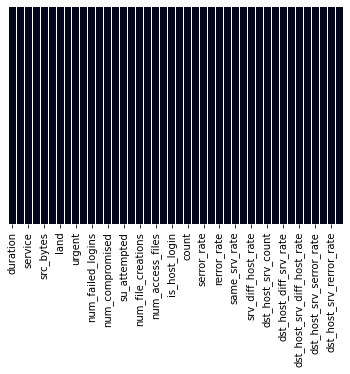

In [75]:
# Checking for the nan values in the dataset
sns.heatmap(train_df_uncleaned.isnull(), yticklabels= False, cbar= False)

In [13]:
train_df_uncleaned.isnull().count()

duration                       494021
protocol_type                  494021
service                        494021
flag                           494021
src_bytes                      494021
dst_bytes                      494021
land                           494021
wrong_fragment                 494021
urgent                         494021
hot                            494021
num_failed_logins              494021
logged_in                      494021
num_compromised                494021
root_shell                     494021
su_attempted                   494021
num_root                       494021
num_file_creations             494021
num_shells                     494021
num_access_files               494021
num_outbound_cmds              494021
is_host_login                  494021
is_guest_login                 494021
count                          494021
srv_count                      494021
serror_rate                    494021
srv_serror_rate                494021
rerror_rate 

In [14]:
train_df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [15]:
train_df_uncleaned.shape

(494021, 42)

In [76]:
# Droping of the all the missing values
train_df_uncleaned.dropna()

# Droping the columns whose unique values are less than 1
train_df_uncleaned = train_df_uncleaned[[col for col in train_df_uncleaned if train_df_uncleaned[col].nunique() > 1]]
train_df_uncleaned.shape

(494021, 40)

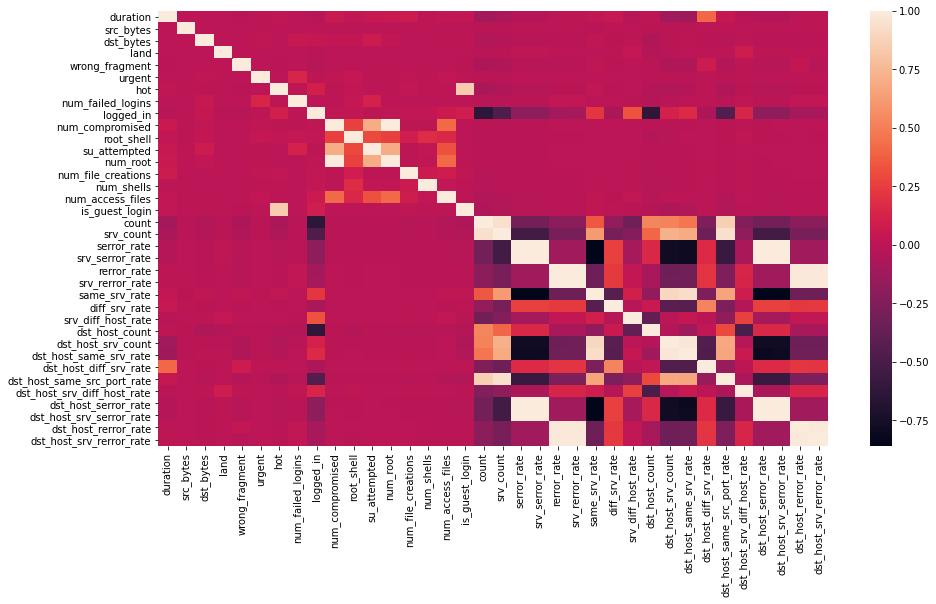

In [17]:
# Find the correation of the different features

df_corr = train_df_uncleaned.corr()

fig = plt.subplots(figsize = (15, 8))

sns.heatmap(df_corr)
plt.show()

In [77]:
train_df_uncleaned.head()

duration protocol_type  ... dst_host_srv_rerror_rate attack_type
0         0           tcp  ...                      0.0      normal
1         0           tcp  ...                      0.0      normal
2         0           tcp  ...                      0.0      normal
3         0           tcp  ...                      0.0      normal
4         0           tcp  ...                      0.0      normal

[5 rows x 40 columns]

In [19]:
train_df_uncleaned.shape

(494021, 40)

In [21]:
train_df = train_df_uncleaned

In [22]:
print(train_df_uncleaned.shape, train_df.shape)

(494021, 32) (494021, 32)


# Feature Mapping

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [24]:
# protocol_type  
print(train_df['protocol_type'].unique())
print(train_df['protocol_type'].value_counts())

['tcp' 'udp' 'icmp']
icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64


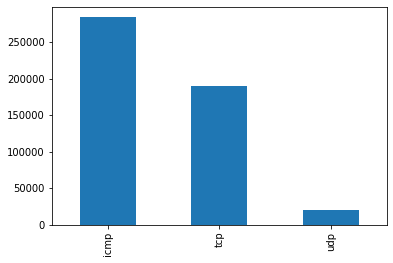

In [32]:
train_df['protocol_type'].value_counts().plot(kind = 'bar')

In [33]:
# Creating the dictonray to convert the object type columns to integer type
protocol_type_map = {'tcp': 0, 'udp': 1, 'icmp': 2}

In [34]:
train_df['protocol_type'] = train_df['protocol_type'].map(protocol_type_map)
train_df.head()

duration  protocol_type  ... dst_host_srv_diff_host_rate attack_type
0         0              0  ...                         0.0      normal
1         0              0  ...                         0.0      normal
2         0              0  ...                         0.0      normal
3         0              0  ...                         0.0      normal
4         0              0  ...                         0.0      normal

[5 rows x 32 columns]

In [40]:
# service
print(train_df['service'].unique())
print(train_df['service'].value_counts())

['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
red_i           1
pm_dump         1
tftp_u          1
Name: service, Length: 66, dtype: int64


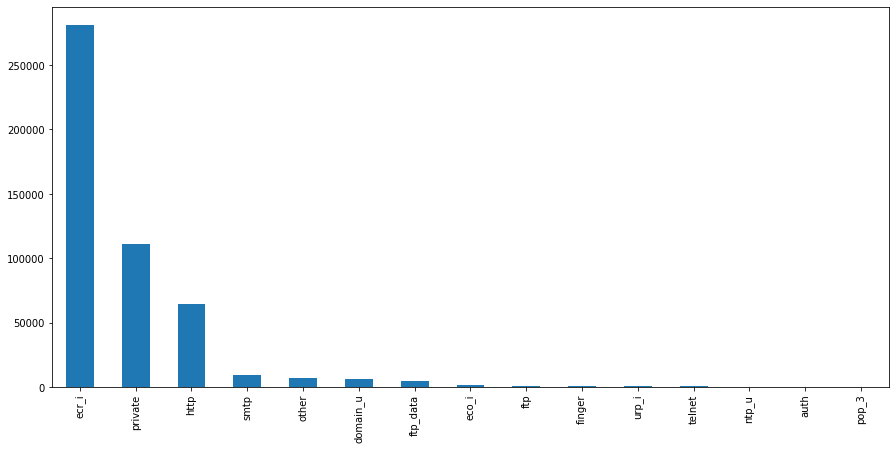

In [39]:
# Top 15 most repeated columns of the dataframe
plt.figure(figsize = (15, 7))
train_df['service'].value_counts()[:15].plot(kind = 'bar')

In [41]:
# We will see the importance of the features first
# service_map = {}
# For now i am dropping the columns from the dataset
train_df.drop('service', axis = 1, inplace = True)

In [42]:
# flag
print(train_df['flag'].unique())
print(train_df['flag'].value_counts())

['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64


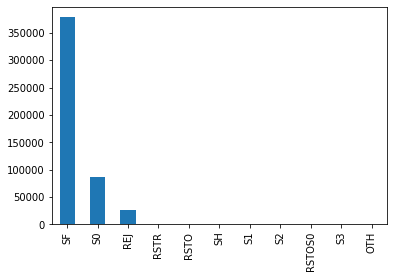

In [44]:
train_df['flag'].value_counts().plot(kind = 'bar')

In [45]:
# flag columns mapping
flag_map = {'SF': 0, 'S0': 1, 'REJ': 3, 'RSTR': 4, 'RSTO': 5, 'SH': 6, 'S1': 7, 
            'S2': 8, 'RSTOS0': 9, 'S3': 10, 'OTH': 11}

train_df['flag'] = train_df['flag'].apply(lambda x: flag_map[x])

In [48]:
print(train_df.shape)
train_df.head()

(494021, 31)


duration  protocol_type  ...  dst_host_srv_diff_host_rate  attack_type
0         0              0  ...                          0.0       normal
1         0              0  ...                          0.0       normal
2         0              0  ...                          0.0       normal
3         0              0  ...                          0.0       normal
4         0              0  ...                          0.0       normal

[5 rows x 31 columns]

In [20]:
# Droping of all the highly correlated columns so they dont impact the model 
train_df_uncleaned.drop('num_root', axis = 1, inplace= True)
train_df_uncleaned.drop('srv_serror_rate', axis = 1, inplace= True)
train_df_uncleaned.drop('srv_rerror_rate', axis = 1, inplace= True)
train_df_uncleaned.drop('dst_host_srv_serror_rate', axis = 1, inplace= True)
train_df_uncleaned.drop('dst_host_serror_rate', axis = 1, inplace= True)
train_df_uncleaned.drop('dst_host_rerror_rate', axis = 1, inplace= True)
train_df_uncleaned.drop('dst_host_srv_rerror_rate', axis = 1, inplace= True)
train_df_uncleaned.drop('dst_host_same_srv_rate', axis = 1, inplace= True)

train_df = train_df_uncleaned

In [47]:
# Spiliting the dataset
x = train_df.drop(['attack_type'], axis = 1)
y = train_df['attack_type']

print(x.shape, y.shape)

(494021, 30) (494021,)


In [49]:
# Scaling the dataset
scale = MinMaxScaler(feature_range=(-1, 1))   
# range impact on the result (hyperparameter)
x = scale.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.35, random_state = 102)

In [50]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(321113, 30) (321113,)
(172908, 30) (172908,)


## Approch 1

Using simple neural network (ANN)

In [54]:
# Setting up the hyperparameter
batch_size = 64
learning_rate = 0.01
optim = 'adam'
epochs = 50

In [52]:
# simple model
# Creating the model (personal one)
def simple_model():
  model = Sequential()

  model.add(Dense(30, input_dim = 30, activation= 'LeakyReLU', kernel_initializer= 'he_uniform'))
  # (Add Dropout) model1.add(Dropout(0.5))

  model.add(Dense(10, activation= 'LeakyReLU'))

  # As we have to possible outcome for any scenario
  model.add(Dense(5, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  print(model.summary())

  return model

In [55]:
model1 = KerasClassifier(build_fn= simple_model, epochs = epochs, batch_size = batch_size)

In [ ]:
history = model1.fit(xtrain, ytrain, verbose= 1)

In [58]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


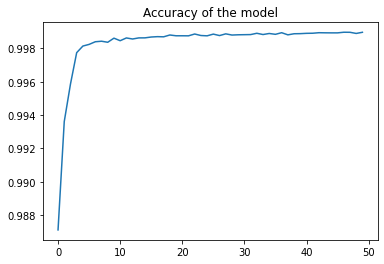

In [60]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy of the model')
plt.show()

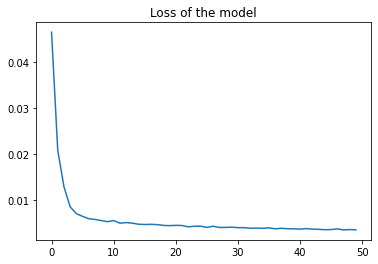

In [62]:
plt.plot(history.history['loss'])
plt.title('Loss of the model')
plt.show()

In [69]:
# Taking prediction on training dataet
train_predict = model1.predict(xtrain)

train_acc = accuracy_score(ytrain, train_predict)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [70]:
print('Accuracy of the model on training dataset: ', train_acc)

Accuracy of the model on training dataset:  0.999162288664738


In [66]:
# Taking prediction of the test dataset
ytest_predict = model1.predict(xtest)

val_acc = accuracy_score(ytest, ytest_predict)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [67]:
print('Accuracy of the model on test dataset: ', val_acc)

0.9989821176579453


## Approch 2

Using simple LSTM 

In [106]:
train_df.shape

(494021, 31)

In [107]:
X = train_df.drop(['attack_type'], axis = 1)
Y = train_df['attack_type']
print(X.shape, Y.shape)

(494021, 30) (494021,)


In [108]:
# Converting the dataframe into array 
x_val = np.array(X.values)
print(x_val.shape)

(494021, 30)


In [110]:
# Making the dataset 3D sutable for the LSTM
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])
x_val

array([[[0.  , 0.  , 0.  , ..., 0.  , 0.11, 0.  ]],

       [[0.  , 0.  , 0.  , ..., 0.  , 0.05, 0.  ]],

       [[0.  , 0.  , 0.  , ..., 0.  , 0.03, 0.  ]],

       ...,

       [[0.  , 0.  , 0.  , ..., 0.  , 0.06, 0.05]],

       [[0.  , 0.  , 0.  , ..., 0.  , 0.04, 0.05]],

       [[0.  , 0.  , 0.  , ..., 0.  , 0.17, 0.05]]])

In [111]:
x_val.shape

(494021, 1, 30)

In [112]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x_val, y, test_size = 0.3, random_state = 42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(345814, 1, 30) (345814,) (148207, 1, 30) (148207,)


In [116]:
# LSTM model2
def lstmModel():

  model = Sequential()

  model.add(LSTM(30, activation='LeakyReLU', input_shape = (30, 1),
                 kernel_initializer = 'he_uniform',  return_sequences = True))
  
  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))

  model.add(LSTM(10, return_sequences= True))

  # model.add(BatchNormalization())
  # model.add(Dropout(0.3))
  
  model.add(Dense(5, activation = 'softmax'))

  model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', 
                metrics = ['accuracy'])

  print(model.summary())
  
  return model

In [117]:
model2 = KerasClassifier(build_fn = lstmModel, epochs = epochs, batch_size = batch_size)

In [118]:
history = model2.fit(x_train, y_train)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 30, 30)            3840      
_________________________________________________________________
lstm_12 (LSTM)               (None, 30, 10)            1640      
_________________________________________________________________
dense_9 (Dense)              (None, 30, 5)             55        
Total params: 5,535
Trainable params: 5,535
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50


ValueError: ignored